### Having a look at the SHERPA results
Dashboard itself can unfortunately not load the results

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
jmeasure = '/nobackup/users/straaten/hyperparams/tg-ex-q0.75-21D_ge5D_sep12-15_jmeasure-dyn/results.csv'

#### Benchmarks (old)
| Target       | leadtime  | RPS raw   | RPS trend  |
|--------------|-----------|-----------|------------|
| 31D > 0.75   | 12-15     | 0.354     | 0.315      |
| 21D > 7D     | 12-15     | 0.424     | 0.398      |
| 21D > 7D     | 19-21     | 0.441     | 0.403      |
| 21D > 7D 1fold | 19-21 | 0.409 | 0.415 |

In [4]:
test = pd.read_csv(jmeasure)
#completed = test.loc[test['Status'] == 'COMPLETED',:] # Completed is actually returning the lowest value seen in the iterations. We want the mean
final = test.loc[np.logical_and(test['Iteration'] == 7,test['Status'] == 'INTERMEDIATE'),:]

In [20]:
final.iloc[final['Objective'].values < 0.46,:]

,Trial-ID,Status,Iteration,batch_size,earlystop_patience,lr,n_hidden_layers,n_hiddenlayer_nodes,Objective,earliest_stop,latest_stop
205,23,INTERMEDIATE,7,16,9,0.001128,1,4,0.459630,11,20
214,24,INTERMEDIATE,7,32,10,0.000567,2,6,0.459777,12,23
313,35,INTERMEDIATE,7,64,7,0.001614,1,4,0.458860,9,18
322,36,INTERMEDIATE,7,64,6,0.001680,1,5,0.457847,8,15
376,42,INTERMEDIATE,7,64,9,0.001549,2,2,0.456791,14,23
403,45,INTERMEDIATE,7,16,10,0.000731,1,4,0.459461,15,29
565,63,INTERMEDIATE,7,32,5,0.001232,1,6,0.458802,7,11
664,74,INTERMEDIATE,7,32,5,0.001222,2,5,0.458343,7,9
808,90,INTERMEDIATE,7,64,7,0.001141,1,5,0.459220,10,24
1006,112,INTERMEDIATE,7,16,10,0.000915,1,5,0.459874,13,18


In [21]:
final.iloc[final['Objective'].values < 0.46,:].median(axis = 0)

/tmp/ipykernel_2416258/773695533.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final.iloc[final['Objective'].values < 0.46,:].median(axis = 0)


Trial-ID               82.00000
Iteration               7.00000
batch_size             32.00000
earlystop_patience      8.00000
lr                      0.00139
n_hidden_layers         1.00000
n_hiddenlayer_nodes     5.00000
Objective               0.45904
earliest_stop          10.50000
latest_stop            19.00000
dtype: float64

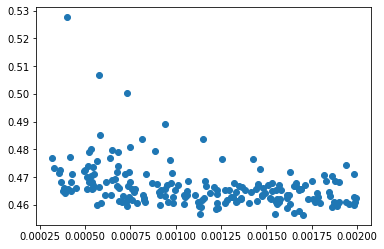

In [9]:
plt.scatter(final['lr'], final['Objective']) # 0.0014

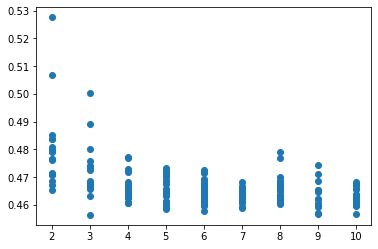

In [10]:
plt.scatter(final['earlystop_patience'], final['Objective']) # 7

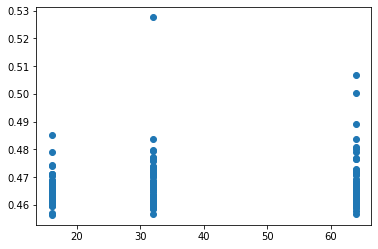

In [16]:
plt.scatter(final['batch_size'], final['Objective']) # 32

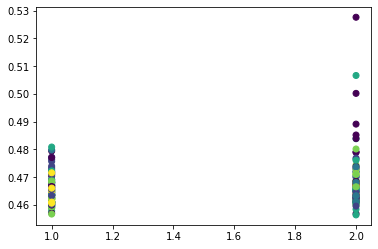

In [15]:
plt.scatter(final['n_hidden_layers'], final['Objective']) # 1

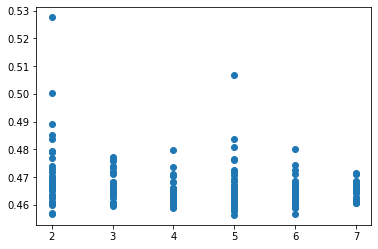

In [22]:
plt.scatter(final['n_hiddenlayer_nodes'], final['Objective'])